# Planform Design
* Visualize the planform in 2D
* Calculate the (total) wing area and aspect ratio, as well as individual areas/ARs for the centerbody and wings
* Calculate the centroid
* Calculate the MAC (mean aerodynamic chord)
* Generate inputs for further analysis in AVL.

,overall_aspect_ratio,overall_centroid,wing_aspect_ratio,wing_centroid,centerbody_aspect_ratio,centerbody_centroid,wing_mean_aerodynamic_chord
NF-844-A,5.58,499.049,3.000,618.108,0.312,344.595,216.666
NF-844-B,5.85,475.236,3.095,582.661,0.362,342.534,241.111


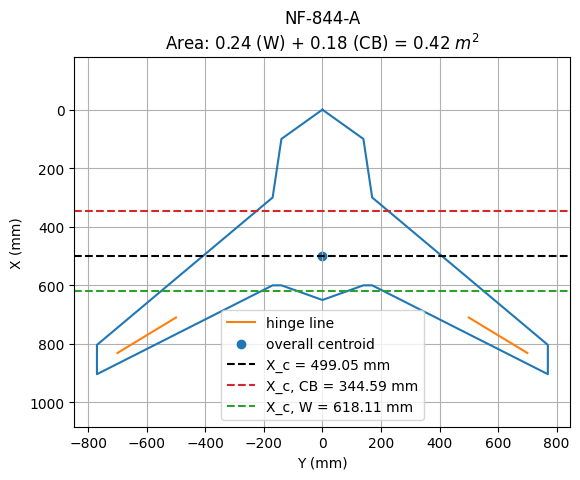

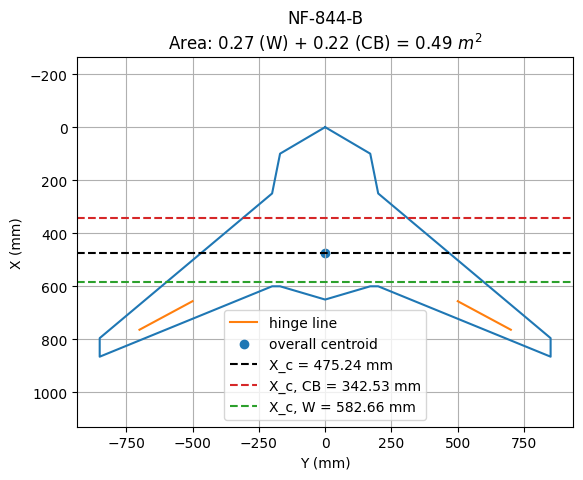

In [1]:
import pandas as pd
from IPython.display import display

from wyvern.layout.planform import PlanformParameters, planform_stats, viz_planform

# Planforms are described by the PlanformParameters class
NF_844_A = PlanformParameters(
    name="NF-844-A",
    centerbody_halfspan=170,
    centerbody_chord=650,
    midbody_y=140,
    midbody_xle=100,
    midbody_chord=500,
    wing_root_le=300,
    wing_root_chord=300,
    wing_halfspan=600,
    wing_taper_ratio=0.33333,
    wing_root_le_sweep_angle=40,
    ctrl_surface_start_y=500,
    ctrl_surface_end_y=700,
    ctrl_surface_x_over_c=0.3,
)


NF_844_B = PlanformParameters(
    name="NF-844-B",
    centerbody_halfspan=200,
    centerbody_chord=650,
    midbody_y=170,
    midbody_xle=100,
    midbody_chord=500,
    wing_root_le=250,
    wing_root_chord=350,
    wing_halfspan=650,
    wing_taper_ratio=0.2,
    wing_root_le_sweep_angle=40,
    ctrl_surface_start_y=500,
    ctrl_surface_end_y=700,
    ctrl_surface_x_over_c=0.3,
)

# concatenate the two planforms into a single DataFrame
planform_df = pd.concat([planform_stats(NF_844_A), planform_stats(NF_844_B)])

with pd.option_context('display.precision', 3):
    display(planform_df)
viz_planform(NF_844_A)
viz_planform(NF_844_B)

In [2]:
# Turn planform parameters into AVL input file
from wyvern.layout.planform import span_stations_to_avl, planform_span_stations

print(span_stations_to_avl(planform_span_stations(NF_844_A)))

SECTION
0.0 0.0 0.0 650.0 0.0
SECTION
100.0 140.0 0.0 500.0 0.0
SECTION
300.0 170.0 0.0 300.0 0.0
SECTION
576.9028782885024 500.0 0.0 189.99945000000002 0.0
CONTROL
elevon 1.0 709.9024932885025 0. 1. 0. 1.0
SECTION
744.7228045239583 700.0 0.0 123.33245000000002 0.0
CONTROL
elevon 1.0 831.0555195239583 0. 1. 0. 1.0
SECTION
803.459778706368 770.0 0.0 99.99900000000001 0.0

